In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

pd.set_option('max_columns', 60)

In [2]:
df = pd.read_csv('chiefs_data_clean.csv')

del[df['game_time']]

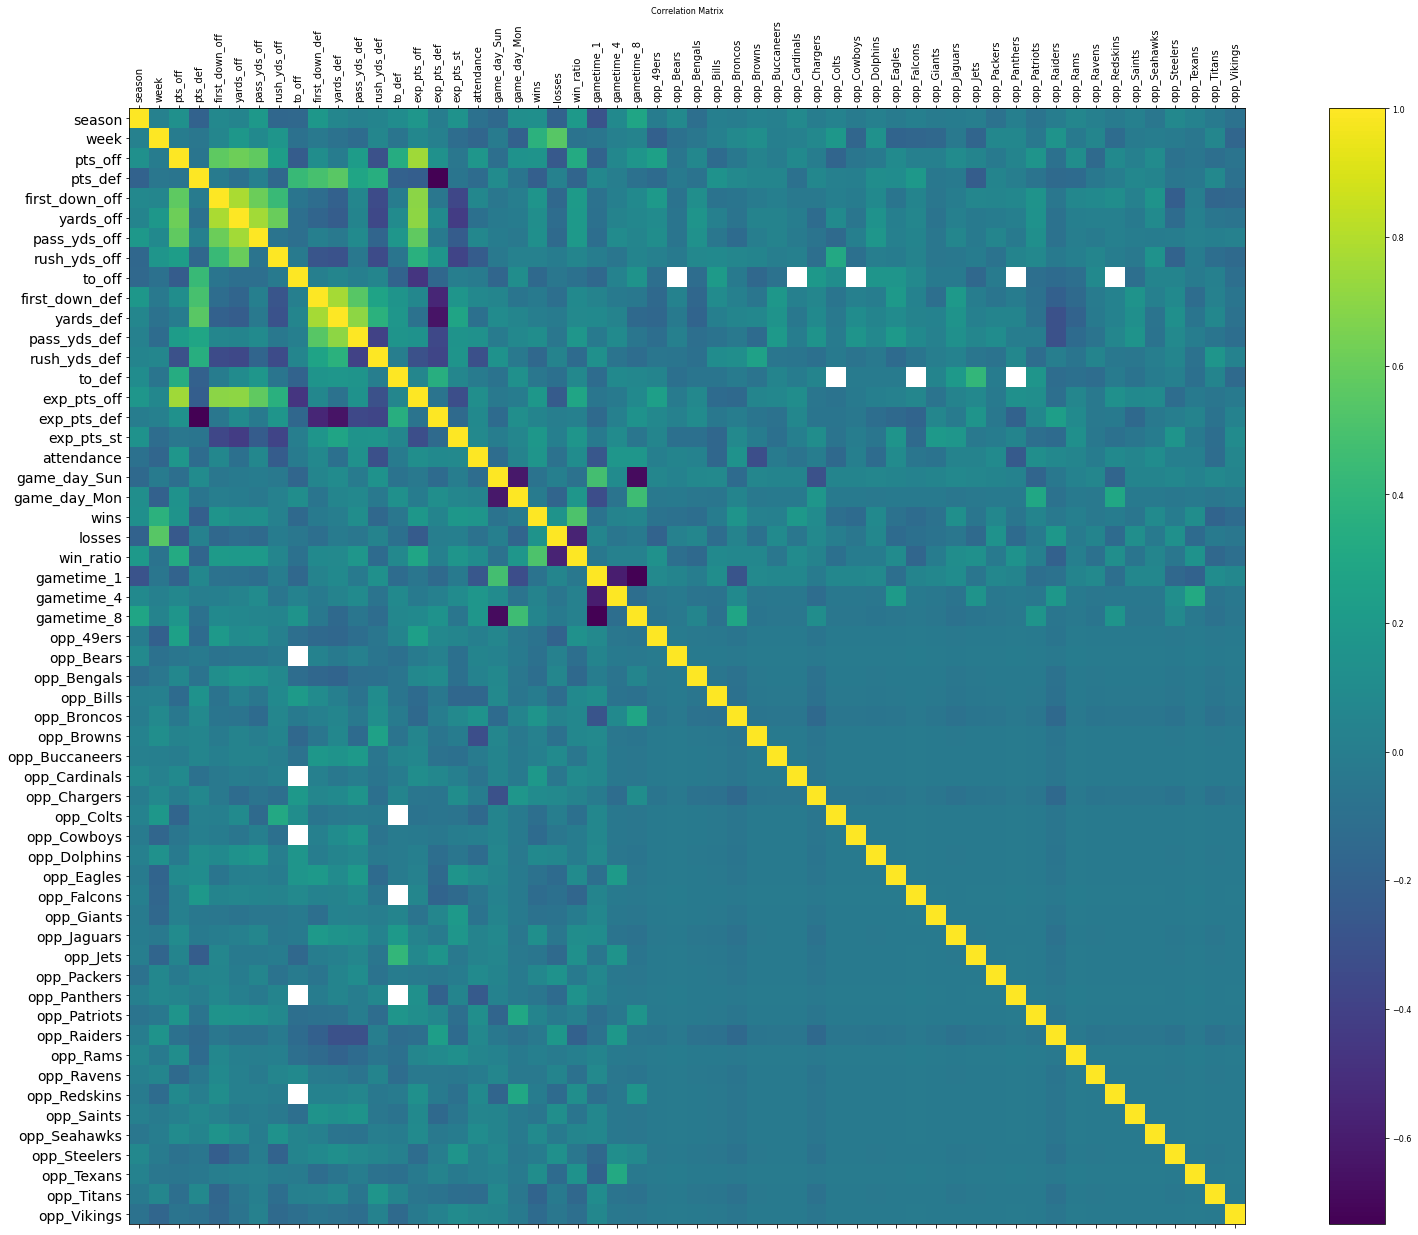

In [5]:
f = plt.figure(figsize=(30, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=8);

In [6]:
help(cb.set_clim)

AttributeError: 'Colorbar' object has no attribute 'set_clim'

In [7]:
df.head()

,season,week,pts_off,pts_def,first_down_off,yards_off,pass_yds_off,rush_yds_off,to_off,first_down_def,yards_def,pass_yds_def,rush_yds_def,to_def,exp_pts_off,exp_pts_def,exp_pts_st,attendance,game_day_Sun,game_day_Mon,wins,losses,win_ratio,gametime_1,gametime_4,gametime_8,opp_49ers,opp_Bears,opp_Bengals,opp_Bills,opp_Broncos,opp_Browns,opp_Buccaneers,opp_Cardinals,opp_Chargers,opp_Colts,opp_Cowboys,opp_Dolphins,opp_Eagles,opp_Falcons,opp_Giants,opp_Jaguars,opp_Jets,opp_Packers,opp_Panthers,opp_Patriots,opp_Raiders,opp_Rams,opp_Ravens,opp_Redskins,opp_Saints,opp_Seahawks,opp_Steelers,opp_Texans,opp_Titans,opp_Vikings
0,2005,1,27.0,7.0,23.0,389.0,191.0,198.0,1.0,19.0,390.0,333.0,57.0,3.0,12.26,11.60,-5.00,78014,1,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,4,31.0,37.0,19.0,353.0,209.0,144.0,4.0,25.0,396.0,368.0,28.0,2.0,-3.72,-10.01,9.11,78742,1,0,2,2,0.500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,6,28.0,21.0,18.0,274.0,178.0,96.0,NaN,26.0,398.0,297.0,101.0,3.0,8.00,1.85,-1.73,78083,1,0,3,2,0.600000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2005,9,27.0,23.0,18.0,321.0,207.0,114.0,1.0,21.0,263.0,162.0,101.0,1.0,4.79,0.50,0.97,79033,1,0,5,3,0.625000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2005,12,26.0,16.0,24.0,420.0,308.0,112.0,1.0,20.0,306.0,232.0,74.0,4.0,9.24,0.60,-3.27,78025,1,0,7,4,0.636364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

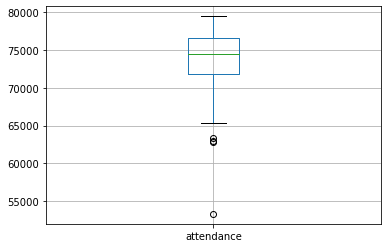

In [8]:
df.boxplot('attendance')

<AxesSubplot:>

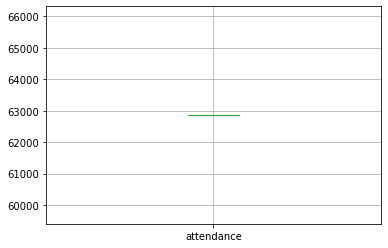

In [9]:
df[df['opp_Panthers'] == 1].boxplot('attendance')

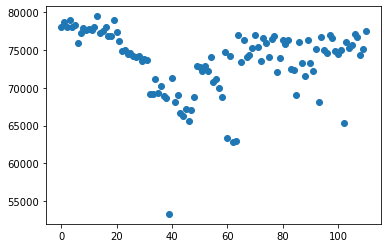

In [11]:
plt.scatter(range(len(df)), df['attendance'])
plt.show()

In [12]:
#take out to_off and to_def

del[df['to_off'], 
   df['to_def']]

In [13]:
#change around order of dataframe so attendance is to the front

target = ['attendance']
predictors = []

for x in list(df.columns):
  if x not in target:
    predictors.append(x)


In [14]:
#preform train_test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
df[predictors], df[target], test_size = .2, random_state = 45
)

x_test = pd.DataFrame(x_test, columns = list(df[predictors].columns))
x_train = pd.DataFrame(x_train, columns = list(df[predictors].columns))

In [15]:
print(y_train.mean() / y_test.mean() - 1)

attendance    0.011044
dtype: float64


In [16]:
x_test.shape

(23, 53)

In [17]:
#model to beat: Average of attendance

aa = []
for x in df['attendance']:
  aa.append(df['attendance'].mean())
  
np.sqrt(mean_squared_error(df['attendance'], aa))

4228.601274177931

In [18]:
from sklearn.linear_model import LassoLars

mod = LassoLars(alpha = 5)

mod_fit = mod.fit(x_train, y_train)

mod_predict = mod.predict(x_test)

print('RMSE =', np.sqrt(mean_squared_error(y_test, mod_predict)))
print('R2 score = ', r2_score(y_test,mod_predict))

RMSE = 5401.4555079186075
R2 score =  0.1364844759541387


In [19]:
params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10,12,14,16,20]}

clf = GridSearchCV(estimator = mod, cv = 7, param_grid = params, 
             scoring = 'r2')

clf_fit = clf.fit(x_train, y_train)

In [20]:
print(clf_fit.best_params_)

{'alpha': 20}


In [21]:
coefs = pd.DataFrame(mod_fit.coef_).transpose()

coefs.columns = list(x_train.columns)

coefs = coefs.transpose().reset_index()

coefs.columns = ['colum','coefficient']

coefs['absolute'] = abs(coefs['coefficient'])

coefs.sort_values('absolute', ascending = False)

,colum,coefficient,absolute
41,opp_Panthers,-10712.984045,10712.984045
39,opp_Jets,-3024.567833,3024.567833
34,opp_Dolphins,-2864.571494,2864.571494
50,opp_Texans,-2659.080341,2659.080341
48,opp_Seahawks,2645.377782,2645.377782
40,opp_Packers,2437.959521,2437.959521
51,opp_Titans,-2312.222288,2312.222288
23,opp_49ers,-1983.978292,1983.978292
21,gametime_4,1879.683191,1879.683191
32,opp_Colts,1799.561775,1799.561775


In [22]:
from sklearn.model_selection import cross_validate

mod_select = cross_validate(mod_fit, x_test, y_test, 
                            cv = 7, scoring = ('neg_mean_squared_error'))

mod_select.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [23]:
#run a gridsearch

from sklearn.model_selection import GridSearchCV

params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10]}

GridSearchCV(estimator = mod_fit, cv = 7, param_grid = params, 
             scoring = 'neg_mean_squared_error')



GridSearchCV(cv=7, estimator=LassoLars(alpha=5),
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [35]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha = 0.8, normalize = True)


ridge_fit = ridge.fit(x_train, y_train)

ridge_predict = ridge_fit.predict(x_test)

print('RMSE =', np.sqrt(mean_squared_error(y_test, ridge_predict)))

mean_list = []
for row in range(len(y_test)) :
    mean_list.append(df['attendance'].mean())

print("mean", np.sqrt(mean_squared_error(y_test, mean_list)))

mean_rmse = np.sqrt(mean_squared_error(y_test, mean_list))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predict))

improvement = ((mean_rmse / ridge_rmse) - 1) * 100
print("delta:", improvement)
print("R Squarred of Ridge Regression:", r2_score(y_test, ridge_predict))

RMSE = 5388.374664359235
mean 5847.653939301543
delta: 8.523521535726841
R Squarred of Ridge Regression: 0.1406618071010618


In [25]:
params = {'alpha': [.2, .4,.6,.8,1,2,4,6,8,10]}

clf = GridSearchCV(estimator = ridge, cv = 7, param_grid = params, 
             scoring = 'neg_mean_squared_error')

clf_fit = clf.fit(x_train, y_train)

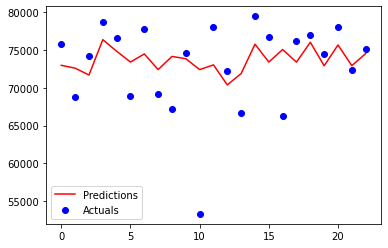

In [40]:
plt.scatter(range(len(y_test)), y_test, color = 'blue', label = "Actuals")
plt.plot(range(len(y_test)), ridge_predict, color = 'red', label = "Predictions")
plt.legend()

In [26]:
print(clf_fit.best_params_)


{'alpha': 0.8}


Results:

It looks like we are getting some lift in the model. If we use the attendance mean as a benchmark, the ridge model had an 8% RMSE improvement. R^2 was fairly low at .14, so there might be different models to try. I am interested in working with tensorflow regression models to see if I can increase r^2.

There is a big outlier at 55,000. Will taking this out improve proformance? 